<a href="https://colab.research.google.com/github/anupa-aa/DeepLearning.AI-Courses/blob/master/Tensorflow_Developer_Certificate/Course_2/Week_4/MultiClass_Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classifier of Rock-Paper-Scissors Dataset

## Download the dataset

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-08-06 14:54:54--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  20.7MB/s    in 10s     

2023-08-06 14:55:04 (18.9 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-08-06 14:55:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-

In [2]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [3]:
# Assign the directory names to variables

import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-027.png', 'rock03-033.png', 'rock07-k03-081.png', 'rock03-031.png', 'rock05ck01-070.png', 'rock05ck01-095.png', 'rock05ck01-118.png', 'rock01-092.png', 'rock05ck01-115.png', 'rock03-057.png']
['paper01-087.png', 'paper02-066.png', 'paper01-035.png', 'paper05-039.png', 'paper01-097.png', 'paper05-100.png', 'paper07-035.png', 'paper01-080.png', 'paper01-017.png', 'paper07-118.png']
['testscissors02-017.png', 'testscissors01-035.png', 'scissors04-110.png', 'testscissors01-095.png', 'testscissors01-103.png', 'scissors02-106.png', 'scissors03-061.png', 'testscissors02-055.png', 'testscissors03-002.png', 'scissors02-091.png']


## Peeking at the data

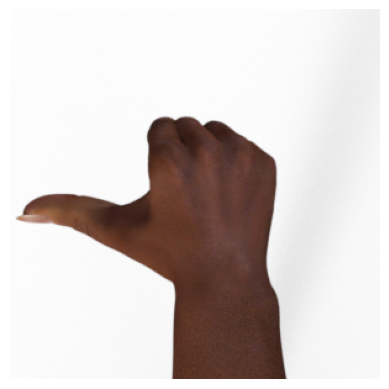

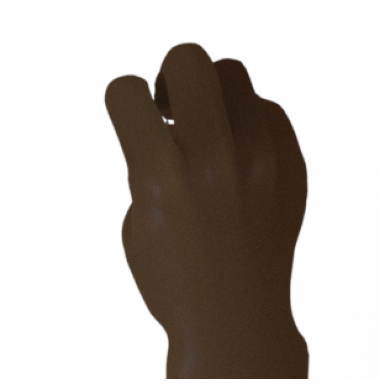

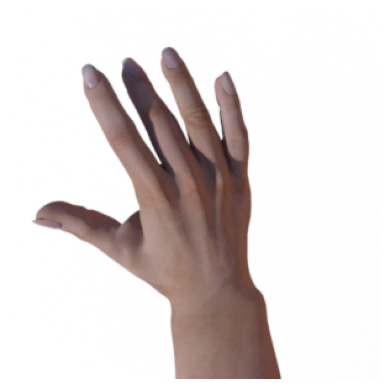

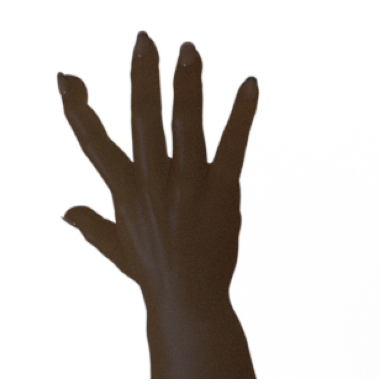

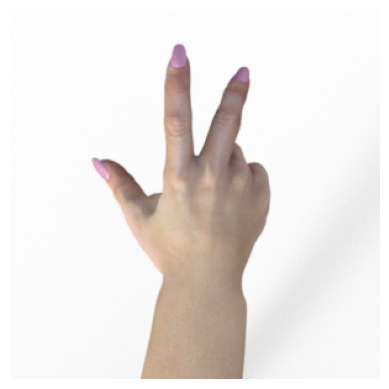

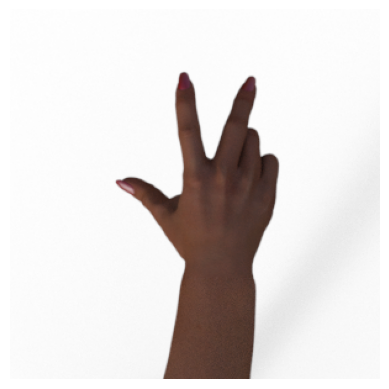

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Data Pre-processing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode="categorical",
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode="categorical",
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Design the model

### Model 1 : CNN from scratch

In [6]:
from tensorflow import keras

model = keras.models.Sequential([
    # Input layer, 1st conv
    keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(3, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

## Training

In [8]:
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data = validation_generator,
    verbose=2,
    validation_steps=3
)

Epoch 1/25
20/20 - 40s - loss: 1.1572 - accuracy: 0.3397 - val_loss: 1.0915 - val_accuracy: 0.3333 - 40s/epoch - 2s/step
Epoch 2/25
20/20 - 22s - loss: 1.0961 - accuracy: 0.3861 - val_loss: 1.1050 - val_accuracy: 0.3333 - 22s/epoch - 1s/step
Epoch 3/25
20/20 - 22s - loss: 1.0499 - accuracy: 0.4619 - val_loss: 0.8476 - val_accuracy: 0.7177 - 22s/epoch - 1s/step
Epoch 4/25
20/20 - 22s - loss: 0.8939 - accuracy: 0.5659 - val_loss: 1.1677 - val_accuracy: 0.3522 - 22s/epoch - 1s/step
Epoch 5/25
20/20 - 22s - loss: 0.8173 - accuracy: 0.6472 - val_loss: 0.6121 - val_accuracy: 0.9624 - 22s/epoch - 1s/step
Epoch 6/25
20/20 - 22s - loss: 0.6509 - accuracy: 0.7004 - val_loss: 0.8905 - val_accuracy: 0.3548 - 22s/epoch - 1s/step
Epoch 7/25
20/20 - 22s - loss: 0.5907 - accuracy: 0.7488 - val_loss: 0.4118 - val_accuracy: 0.7177 - 22s/epoch - 1s/step
Epoch 8/25
20/20 - 22s - loss: 0.5206 - accuracy: 0.7770 - val_loss: 0.1367 - val_accuracy: 1.0000 - 22s/epoch - 1s/step
Epoch 9/25
20/20 - 22s - loss: 0

## Evaluation

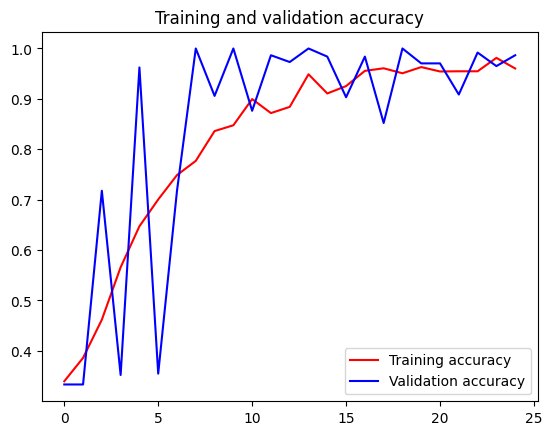

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Model Prediction

In [10]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)